In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score,precision_score ,confusion_matrix,recall_score

In [2]:
education =pd.read_csv(r'C:\Users\Ikshita\Desktop\LosAngelesSocioEconomic\Educational_Attainment__LA_Revised.csv')
employ =pd.read_csv(r'C:\Users\Ikshita\Desktop\LosAngelesSocioEconomic\Employment__LA_Revised.csv')
hous =pd.read_csv(r'C:\Users\Ikshita\Desktop\LosAngelesSocioEconomic\Housing_Units__LA_Revised.csv')
inc =pd.read_csv(r'C:\Users\Ikshita\Desktop\LosAngelesSocioEconomic\Income__LA_Revised.csv')
cri =pd.read_csv(r'C:\Users\Ikshita\Desktop\LosAngelesSocioEconomic\Part_I_Crimes__LA_Revised.csv')
pop =pd.read_csv(r'C:\Users\Ikshita\Desktop\LosAngelesSocioEconomic\Population__LA_Revised.csv')
race =pd.read_csv(r'C:\Users\Ikshita\Desktop\LosAngelesSocioEconomic\Race___Ethnicity__LA_Revised.csv')
pov =pd.read_csv(r'C:\Users\Ikshita\Desktop\LosAngelesSocioEconomic\Poverty__LA_Revised.csv')

education = education.dropna()
employ = employ.dropna()
hous = hous.dropna()
inc = inc.dropna()
cri = cri.dropna()
pop = pop.dropna()
race = race.dropna()
pov = pov.dropna()

In [3]:
education = (education.set_index(['Location', 'Year','EduVariable'])['EduCount']
       .unstack()
       .reset_index()
       .rename_axis(None, axis=1))
education.head()

,Location,Year,College Graduation Rate,High School Dropout Rate,Young Adults Enrolled in School
0,"(33.343563, -118.3300478)",2010,512.0,584.0,0.0
1,"(33.343563, -118.3300478)",2011,429.0,570.0,0.0
2,"(33.343563, -118.3300478)",2012,471.0,619.0,68.0
3,"(33.343563, -118.3300478)",2013,416.0,606.0,83.0
4,"(33.343563, -118.3300478)",2014,390.0,572.0,99.0


In [4]:
employ = (employ.set_index(['Location', 'Year','EmpVariable'])['EmpCount']
       .unstack()
       .reset_index()
       .rename_axis(None, axis=1))
employ.head()

,Location,Year,Labor Force Participation Rate,Unemployment Rate
0,"(33.343563, -118.3300478)",2010,2298.0,110.0
1,"(33.343563, -118.3300478)",2011,2143.0,157.0
2,"(33.343563, -118.3300478)",2012,2185.0,194.0
3,"(33.343563, -118.3300478)",2013,2116.0,191.0
4,"(33.343563, -118.3300478)",2014,1972.0,135.0


In [5]:
race = (race.set_index(['Location', 'Year','RaceVariable'])['RaceCount']
       .unstack()
       .reset_index()
       .rename_axis(None, axis=1))
race.head()

,Location,Year,American Indian/Native Population,Asian Population,Black Population,Hispanic Population,Native Hawaiian/Other Pacific Islander Population,Other Race Population,Population of Two or More Races,White Population
0,"(33.343563, -118.3300478)",2010,0.0,0.0,0.0,2241.0,0.0,0.0,39.0,1359.0
1,"(33.343563, -118.3300478)",2011,0.0,13.0,1.0,2275.0,0.0,0.0,44.0,1353.0
2,"(33.343563, -118.3300478)",2012,0.0,6.0,1.0,2292.0,0.0,0.0,48.0,1230.0
3,"(33.343563, -118.3300478)",2013,0.0,2.0,9.0,2378.0,0.0,0.0,71.0,1103.0
4,"(33.343563, -118.3300478)",2014,0.0,3.0,10.0,2616.0,0.0,0.0,55.0,879.0


In [6]:
df = pd.merge(race, education, on=['Location','Year'], how='inner')
df = pd.merge(df, employ, on=['Location','Year'], how='inner')
df = pd.merge(df, hous, on=['Location','Year'], how='inner')
df = pd.merge(df, inc, on=['Location','Year'], how='inner')
df = pd.merge(df, pop, on=['Location','Year'], how='inner')
df = pd.merge(df, cri, on=['Location','Year'], how='inner')
df = pd.merge(df, pov, on=['Location','Year'], how='inner')
df.to_csv(r'C:\Users\Ikshita\Desktop\LosAngelesSocioEconomic\Socioeconomic_LA.csv')

In [7]:
len(df)
df = df.dropna()
print(len(df))

32112


In [8]:
df.to_csv(r'C:\Users\Ikshita\Desktop\LosAngelesSocioEconomic\Socioeconomic_LA.csv')

In [9]:
violent = df.loc[df['CrimeVariable'] == 'Part I Violent Crimes']

In [10]:
import matplotlib.pyplot as plt
violent.plot(x='Year', y='CrimeRate', style='o')

In [11]:
violent['Intensity'] = pd.cut(violent.CrimeRate, bins=[-np.inf,25,80,np.inf], labels=['Low','Medium','High'])

C:\Users\Ikshita\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
violent.Intensity.value_counts()

Low       15834
Medium      198
High         24
Name: Intensity, dtype: int64

#### Predict Crime Type 

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
violent['Intensity_Encoded'] = LabelEncoder().fit_transform(violent['Intensity'])
data_crime = violent.iloc[:,2:]
data_crime = data_crime.drop(['CrimeVariable','CrimeRate','Intensity'], axis=1)
data_crime

C:\Users\Ikshita\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,American Indian/Native Population,Asian Population,Black Population,Hispanic Population,Native Hawaiian/Other Pacific Islander Population,Other Race Population,Population of Two or More Races,White Population,College Graduation Rate,High School Dropout Rate,Young Adults Enrolled in School,Labor Force Participation Rate,Unemployment Rate,HousingCount,MedianIncome,PopCount,PovertyCount,Intensity_Encoded
0,0.0,6.0,1.0,2292.0,0.0,0.0,48.0,1230.0,471.0,619.0,68.0,2185.0,194.0,2043,53295.0,3577,504.0,1
1,0.0,6.0,1.0,2292.0,0.0,0.0,48.0,1230.0,471.0,619.0,68.0,2185.0,194.0,2043,53295.0,3577,821.0,1
6,0.0,2.0,9.0,2378.0,0.0,0.0,71.0,1103.0,416.0,606.0,83.0,2116.0,191.0,2018,65625.0,3563,445.0,1
7,0.0,2.0,9.0,2378.0,0.0,0.0,71.0,1103.0,416.0,606.0,83.0,2116.0,191.0,2018,65625.0,3563,941.0,1
8,0.0,3.0,10.0,2616.0,0.0,0.0,55.0,879.0,390.0,572.0,99.0,1972.0,135.0,2128,55404.0,3563,390.0,1
9,0.0,3.0,10.0,2616.0,0.0,0.0,55.0,879.0,390.0,572.0,99.0,1972.0,135.0,2128,55404.0,3563,1245.0,1
12,0.0,2.0,7.0,2509.0,0.0,0.0,56.0,997.0,447.0,540.0,109.0,1913.0,121.0,2092,60375.0,3571,529.0,1
13,0.0,2.0,7.0,2509.0,0.0,0.0,56.0,997.0,447.0,540.0,109.0,1913.0,121.0,2092,60375.0,3571,1033.0,1
18,0.0,3.0,8.0,2553.0,0.0,0.0,53.0,964.0,476.0,448.0,107.0,1984.0,77.0,2038,62440.0,3581,471.0,1
19,0.0,3.0,8.0,2553.0,0.0,0.0,53.0,964.0,476.0,448.0,107.0,1984.0,77.0,2038,62440.0,3581,1030.0,1


In [14]:
x = data_crime.iloc[:,:-1].values
y = data_crime['Intensity_Encoded'].values

In [173]:
from sklearn.ensemble import RandomForestClassifier
kf = KFold(n_splits=10)                                                     # K-Folds = 10 
kf.get_n_splits(x)
accuracy=[]
yt = []
yp = []
for train_index, test_index in kf.split(x):                                 # For each train and test data
    x_train, x_test = x[train_index], x[test_index]                                   
    y_train, y_test = y[train_index], y[test_index]
    classifier =RandomForestClassifier(n_estimators = 3, criterion = 'entropy')     # Random Forest Classifier
    classifier.fit(x_train,y_train)
    y_pred = classifier.predict(x_test)
    cm=confusion_matrix(y_test,y_pred)
    print('===============================================================================')
    print("Confusion Matrix:")
    print(cm)
    acc= accuracy_score(y_test,y_pred)*100
    print("Accuracy is: %0.3f" % acc)                                        # Accuracy in each 10 folds
    accuracy.append(acc)
    pr = precision_score(y_test, y_pred,average=None)
    print("Precision :", pr)                                                 # Precision in each 10 folds
    recscr = recall_score(y_test, y_pred,average=None)
    print("Recall :",  recscr)                                               # Recall in each 10 folds
    f1 = f1_score(y_test, y_pred,average=None)
    print("F1-Score : ",  f1)                                                # F1-Score in each 10 folds
    yt += list(y_test)
    yp += list(y_pred)

avg_accu = np.mean(accuracy)
print("Average Accuracy: %0.3f" % avg_accu)                                  # Average Accuracy across 10 folds
print(classification_report(yt, yp))                                         # Average Accuracy Precision Recall F1-Score across 10 folds

Confusion Matrix:
[[   0    0    0]
 [   2 1592    4]
 [   2    6    0]]
Accuracy is: 99.128
Precision : [ 0.          0.99624531  0.        ]
Recall : [ 0.          0.99624531  0.        ]
F1-Score :  [ 0.          0.99624531  0.        ]
Confusion Matrix:
[[   0    0    0]
 [   4 1572    2]
 [   0   28    0]]
Accuracy is: 97.883
Precision : [ 0.      0.9825  0.    ]
Recall : [ 0.          0.99619772  0.        ]
F1-Score :  [ 0.          0.98930145  0.        ]


C:\Users\Ikshita\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ikshita\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ikshita\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ikshita\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Confusion Matrix:
[[1580    4]
 [  22    0]]
Accuracy is: 98.381
Precision : [ 0.98626717  0.        ]
Recall : [ 0.99747475  0.        ]
F1-Score :  [ 0.9918393  0.       ]
Confusion Matrix:
[[   0   14    0]
 [   0 1545    5]
 [   0   42    0]]
Accuracy is: 96.202
Precision : [ 0.          0.96502186  0.        ]
Recall : [ 0.          0.99677419  0.        ]
F1-Score :  [ 0.          0.98064107  0.        ]


C:\Users\Ikshita\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ikshita\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion Matrix:
[[   0    2    0]
 [   6 1522   10]
 [   4   54    8]]
Accuracy is: 95.268
Precision : [ 0.          0.96451204  0.44444444]
Recall : [ 0.          0.98959688  0.12121212]
F1-Score :  [ 0.          0.97689345  0.19047619]
Confusion Matrix:
[[1602    2]
 [   0    2]]
Accuracy is: 99.875
Precision : [ 1.   0.5]
Recall : [ 0.99875312  1.        ]
F1-Score :  [ 0.99937617  0.66666667]
Confusion Matrix:
[[1579    8]
 [  18    0]]
Accuracy is: 98.380
Precision : [ 0.98872887  0.        ]
Recall : [ 0.99495904  0.        ]
F1-Score :  [ 0.99183417  0.        ]
Confusion Matrix:
[[   0    4    2]
 [   0 1598    1]
 [   0    0    0]]
Accuracy is: 99.564
Precision : [ 0.          0.99750312  0.        ]
Recall : [ 0.          0.99937461  0.        ]
F1-Score :  [ 0.          0.99843799  0.        ]


C:\Users\Ikshita\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ikshita\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ikshita\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ikshita\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ikshita\Anaconda3\lib\site-packages\sklearn\metrics\classification.p

Confusion Matrix:
[[   0    0    0]
 [   4 1597    2]
 [   0    2    0]]
Accuracy is: 99.502
Precision : [ 0.          0.99874922  0.        ]
Recall : [ 0.          0.99625702  0.        ]
F1-Score :  [ 0.          0.99750156  0.        ]
Confusion Matrix:
[[   2    0    0]
 [   0 1582   11]
 [   0   10    0]]
Accuracy is: 98.692
Precision : [ 1.          0.99371859  0.        ]
Recall : [ 1.          0.99309479  0.        ]
F1-Score :  [ 1.          0.99340659  0.        ]
Average Accuracy: 98.287
             precision    recall  f1-score   support

          0       0.08      0.08      0.08        24
          1       0.99      1.00      0.99     15834
          2       0.16      0.05      0.08       198

avg / total       0.98      0.98      0.98     16056



In [174]:
actual2015 = violent.loc[violent['Year'] == 2015]
actual2015 = actual2015.drop(['CrimeVariable','CrimeRate','Intensity'], axis=1)
pred2015 = actual2015.iloc[:,:-1]
x2015 = actual2015.iloc[:,2:-1].values
y2015 = actual2015['Intensity_Encoded'].values
y_pred = classifier.predict(x2015)
cm=confusion_matrix(y2015,y_pred)
pred2015['Intensity_Encoded'] = y_pred

In [175]:
actual2015.loc[actual2015['Intensity_Encoded'] == 2]

,Location,Year,American Indian/Native Population,Asian Population,Black Population,Hispanic Population,Native Hawaiian/Other Pacific Islander Population,Other Race Population,Population of Two or More Races,White Population,College Graduation Rate,High School Dropout Rate,Young Adults Enrolled in School,Labor Force Participation Rate,Unemployment Rate,HousingCount,MedianIncome,PopCount,PovertyCount,Intensity_Encoded
5120,"(33.932497, -118.2502625)",2015,0.0,0.0,1685.0,3229.0,0.0,0.0,11.0,7.0,24.0,1165.0,202.0,1429.0,568.0,1324,12984.0,4932,3328.0,2
5121,"(33.932497, -118.2502625)",2015,0.0,0.0,1685.0,3229.0,0.0,0.0,11.0,7.0,24.0,1165.0,202.0,1429.0,568.0,1324,12984.0,4932,1015.0,2
6260,"(33.962152, -118.2861365)",2015,0.0,0.0,1213.0,2694.0,0.0,0.0,0.0,9.0,73.0,974.0,87.0,1329.0,151.0,1151,25000.0,3916,1829.0,2
6261,"(33.962152, -118.2861365)",2015,0.0,0.0,1213.0,2694.0,0.0,0.0,0.0,9.0,73.0,974.0,87.0,1329.0,151.0,1151,25000.0,3916,1465.0,2
6300,"(33.96229, -118.275105)",2015,0.0,0.0,1448.0,2207.0,0.0,0.0,0.0,14.0,71.0,875.0,84.0,1458.0,191.0,1096,25536.0,3669,1318.0,2
6301,"(33.96229, -118.275105)",2015,0.0,0.0,1448.0,2207.0,0.0,0.0,0.0,14.0,71.0,875.0,84.0,1458.0,191.0,1096,25536.0,3669,1319.0,2
8082,"(33.98764338, -118.4696387)",2015,0.0,121.0,115.0,246.0,0.0,36.0,222.0,2224.0,1591.0,30.0,17.0,2314.0,250.0,1849,64263.0,2964,371.0,2
8083,"(33.98764338, -118.4696387)",2015,0.0,121.0,115.0,246.0,0.0,36.0,222.0,2224.0,1591.0,30.0,17.0,2314.0,250.0,1849,64263.0,2964,360.0,2
8420,"(33.99279828, -118.4770569)",2015,0.0,190.0,105.0,211.0,0.0,0.0,129.0,2162.0,1618.0,50.0,75.0,2195.0,263.0,2263,50703.0,2797,278.0,2
8421,"(33.99279828, -118.4770569)",2015,0.0,190.0,105.0,211.0,0.0,0.0,129.0,2162.0,1618.0,50.0,75.0,2195.0,263.0,2263,50703.0,2797,406.0,2


In [176]:
pred2015.loc[pred2015['Intensity_Encoded'] == 2]

,Location,Year,American Indian/Native Population,Asian Population,Black Population,Hispanic Population,Native Hawaiian/Other Pacific Islander Population,Other Race Population,Population of Two or More Races,White Population,College Graduation Rate,High School Dropout Rate,Young Adults Enrolled in School,Labor Force Participation Rate,Unemployment Rate,HousingCount,MedianIncome,PopCount,PovertyCount,Intensity_Encoded
5120,"(33.932497, -118.2502625)",2015,0.0,0.0,1685.0,3229.0,0.0,0.0,11.0,7.0,24.0,1165.0,202.0,1429.0,568.0,1324,12984.0,4932,3328.0,2
5121,"(33.932497, -118.2502625)",2015,0.0,0.0,1685.0,3229.0,0.0,0.0,11.0,7.0,24.0,1165.0,202.0,1429.0,568.0,1324,12984.0,4932,1015.0,2
6260,"(33.962152, -118.2861365)",2015,0.0,0.0,1213.0,2694.0,0.0,0.0,0.0,9.0,73.0,974.0,87.0,1329.0,151.0,1151,25000.0,3916,1829.0,2
6261,"(33.962152, -118.2861365)",2015,0.0,0.0,1213.0,2694.0,0.0,0.0,0.0,9.0,73.0,974.0,87.0,1329.0,151.0,1151,25000.0,3916,1465.0,2
6300,"(33.96229, -118.275105)",2015,0.0,0.0,1448.0,2207.0,0.0,0.0,0.0,14.0,71.0,875.0,84.0,1458.0,191.0,1096,25536.0,3669,1318.0,2
6301,"(33.96229, -118.275105)",2015,0.0,0.0,1448.0,2207.0,0.0,0.0,0.0,14.0,71.0,875.0,84.0,1458.0,191.0,1096,25536.0,3669,1319.0,2
8082,"(33.98764338, -118.4696387)",2015,0.0,121.0,115.0,246.0,0.0,36.0,222.0,2224.0,1591.0,30.0,17.0,2314.0,250.0,1849,64263.0,2964,371.0,2
8083,"(33.98764338, -118.4696387)",2015,0.0,121.0,115.0,246.0,0.0,36.0,222.0,2224.0,1591.0,30.0,17.0,2314.0,250.0,1849,64263.0,2964,360.0,2
8420,"(33.99279828, -118.4770569)",2015,0.0,190.0,105.0,211.0,0.0,0.0,129.0,2162.0,1618.0,50.0,75.0,2195.0,263.0,2263,50703.0,2797,278.0,2
8421,"(33.99279828, -118.4770569)",2015,0.0,190.0,105.0,211.0,0.0,0.0,129.0,2162.0,1618.0,50.0,75.0,2195.0,263.0,2263,50703.0,2797,406.0,2


In [177]:
actual2016 = violent.loc[violent['Year'] == 2016]
actual2016 = actual2016.drop(['CrimeVariable','CrimeRate','Intensity'], axis=1)
pred2016 = actual2016.iloc[:,:-1]
x2016 = actual2016.iloc[:,2:-1].values
y2016 = actual2016['Intensity_Encoded'].values
y_pred = classifier.predict(x2016)
cm=confusion_matrix(y2016,y_pred)
pred2016['Intensity_Encoded'] = y_pred

In [178]:
actual2016.loc[actual2016['Intensity_Encoded'] == 2]

,Location,Year,American Indian/Native Population,Asian Population,Black Population,Hispanic Population,Native Hawaiian/Other Pacific Islander Population,Other Race Population,Population of Two or More Races,White Population,College Graduation Rate,High School Dropout Rate,Young Adults Enrolled in School,Labor Force Participation Rate,Unemployment Rate,HousingCount,MedianIncome,PopCount,PovertyCount,Intensity_Encoded
754,"(33.778611, -118.295234)",2016,0.0,28.0,119.0,72.0,32.0,0.0,1.0,77.0,16.0,64.0,28.0,169.0,41.0,285,45962.0,329,67.0,2
755,"(33.778611, -118.295234)",2016,0.0,28.0,119.0,72.0,32.0,0.0,1.0,77.0,16.0,64.0,28.0,169.0,41.0,285,45962.0,329,102.0,2
4984,"(33.9273235, -118.3002815)",2016,0.0,37.0,1100.0,2210.0,0.0,18.0,107.0,47.0,102.0,673.0,247.0,1841.0,299.0,1224,32093.0,3519,1080.0,2
4985,"(33.9273235, -118.3002815)",2016,0.0,37.0,1100.0,2210.0,0.0,18.0,107.0,47.0,102.0,673.0,247.0,1841.0,299.0,1224,32093.0,3519,1147.0,2
5184,"(33.9333785, -118.2856645)",2016,38.0,0.0,1738.0,2842.0,0.0,0.0,152.0,37.0,168.0,1343.0,184.0,1801.0,247.0,1564,31496.0,4807,2196.0,2
5185,"(33.9333785, -118.2856645)",2016,38.0,0.0,1738.0,2842.0,0.0,0.0,152.0,37.0,168.0,1343.0,184.0,1801.0,247.0,1564,31496.0,4807,1049.0,2
5326,"(33.935471, -118.304648)",2016,0.0,0.0,1934.0,760.0,0.0,0.0,139.0,39.0,265.0,370.0,131.0,1456.0,263.0,1186,35577.0,2872,893.0,2
5327,"(33.935471, -118.304648)",2016,0.0,0.0,1934.0,760.0,0.0,0.0,139.0,39.0,265.0,370.0,131.0,1456.0,263.0,1186,35577.0,2872,431.0,2
6104,"(33.9564355, -118.2859575)",2016,0.0,7.0,1068.0,3641.0,0.0,0.0,7.0,148.0,165.0,1186.0,199.0,2153.0,268.0,1714,27125.0,4871,1421.0,2
6105,"(33.9564355, -118.2859575)",2016,0.0,7.0,1068.0,3641.0,0.0,0.0,7.0,148.0,165.0,1186.0,199.0,2153.0,268.0,1714,27125.0,4871,1432.0,2


In [179]:
pred2016.loc[pred2016['Intensity_Encoded'] == 2]

,Location,Year,American Indian/Native Population,Asian Population,Black Population,Hispanic Population,Native Hawaiian/Other Pacific Islander Population,Other Race Population,Population of Two or More Races,White Population,College Graduation Rate,High School Dropout Rate,Young Adults Enrolled in School,Labor Force Participation Rate,Unemployment Rate,HousingCount,MedianIncome,PopCount,PovertyCount,Intensity_Encoded
754,"(33.778611, -118.295234)",2016,0.0,28.0,119.0,72.0,32.0,0.0,1.0,77.0,16.0,64.0,28.0,169.0,41.0,285,45962.0,329,67.0,2
755,"(33.778611, -118.295234)",2016,0.0,28.0,119.0,72.0,32.0,0.0,1.0,77.0,16.0,64.0,28.0,169.0,41.0,285,45962.0,329,102.0,2
4984,"(33.9273235, -118.3002815)",2016,0.0,37.0,1100.0,2210.0,0.0,18.0,107.0,47.0,102.0,673.0,247.0,1841.0,299.0,1224,32093.0,3519,1080.0,2
4985,"(33.9273235, -118.3002815)",2016,0.0,37.0,1100.0,2210.0,0.0,18.0,107.0,47.0,102.0,673.0,247.0,1841.0,299.0,1224,32093.0,3519,1147.0,2
5185,"(33.9333785, -118.2856645)",2016,38.0,0.0,1738.0,2842.0,0.0,0.0,152.0,37.0,168.0,1343.0,184.0,1801.0,247.0,1564,31496.0,4807,1049.0,2
5326,"(33.935471, -118.304648)",2016,0.0,0.0,1934.0,760.0,0.0,0.0,139.0,39.0,265.0,370.0,131.0,1456.0,263.0,1186,35577.0,2872,893.0,2
5327,"(33.935471, -118.304648)",2016,0.0,0.0,1934.0,760.0,0.0,0.0,139.0,39.0,265.0,370.0,131.0,1456.0,263.0,1186,35577.0,2872,431.0,2
6104,"(33.9564355, -118.2859575)",2016,0.0,7.0,1068.0,3641.0,0.0,0.0,7.0,148.0,165.0,1186.0,199.0,2153.0,268.0,1714,27125.0,4871,1421.0,2
6105,"(33.9564355, -118.2859575)",2016,0.0,7.0,1068.0,3641.0,0.0,0.0,7.0,148.0,165.0,1186.0,199.0,2153.0,268.0,1714,27125.0,4871,1432.0,2
6266,"(33.962152, -118.2861365)",2016,0.0,47.0,1180.0,2895.0,0.0,0.0,0.0,11.0,67.0,963.0,114.0,1341.0,156.0,1151,24420.0,4133,1785.0,2


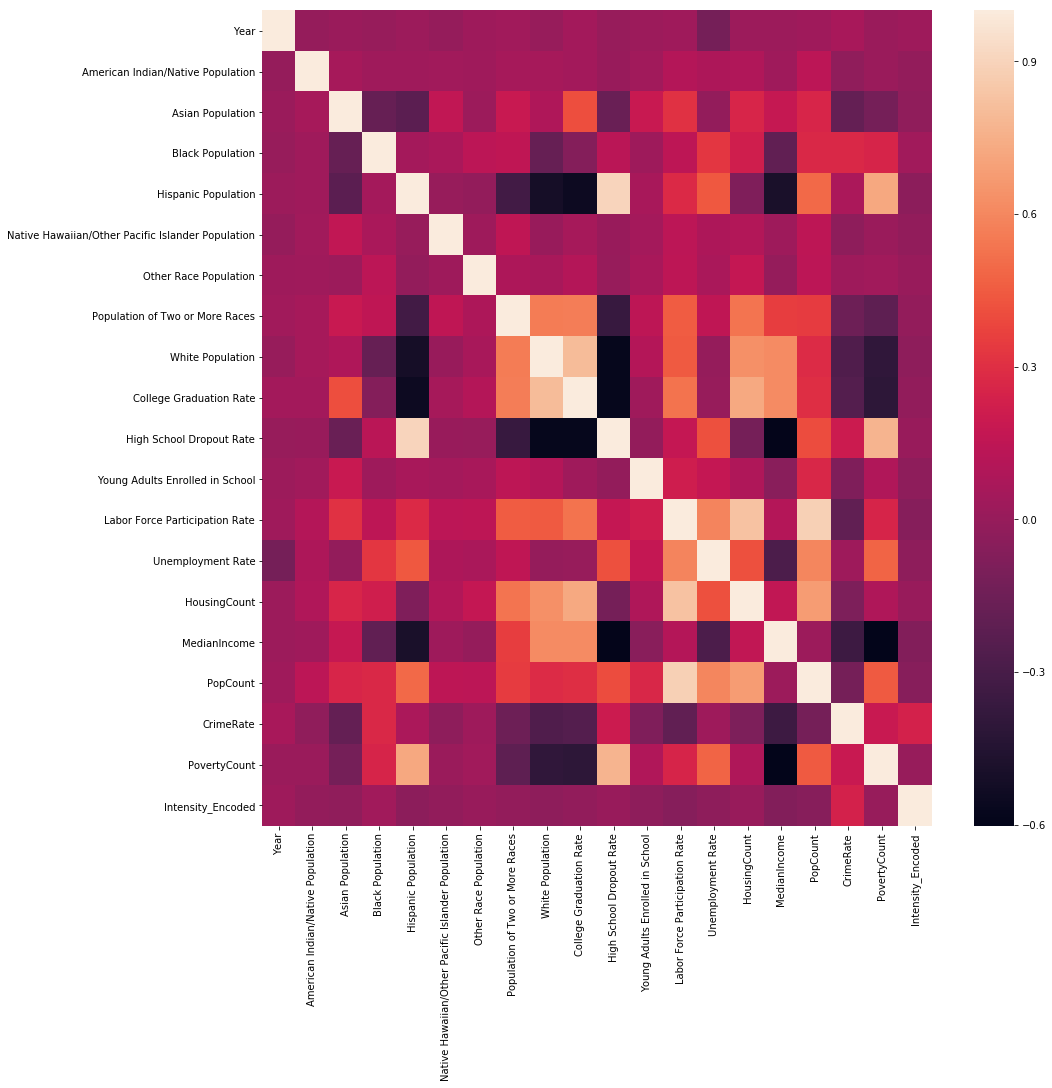

In [23]:
import seaborn as sns
from matplotlib import pyplot
pyplot.subplots(figsize=(15,15))
sns.heatmap(violent.corr())

In [18]:
violent

,Location,Year,American Indian/Native Population,Asian Population,Black Population,Hispanic Population,Native Hawaiian/Other Pacific Islander Population,Other Race Population,Population of Two or More Races,White Population,...,Labor Force Participation Rate,Unemployment Rate,HousingCount,MedianIncome,PopCount,CrimeVariable,CrimeRate,PovertyCount,Intensity,Intensity_Encoded
0,"(33.343563, -118.3300478)",2012,0.0,6.0,1.0,2292.0,0.0,0.0,48.0,1230.0,...,2185.0,194.0,2043,53295.0,3577,Part I Violent Crimes,3.913894,504.0,Low,1
1,"(33.343563, -118.3300478)",2012,0.0,6.0,1.0,2292.0,0.0,0.0,48.0,1230.0,...,2185.0,194.0,2043,53295.0,3577,Part I Violent Crimes,3.913894,821.0,Low,1
6,"(33.343563, -118.3300478)",2013,0.0,2.0,9.0,2378.0,0.0,0.0,71.0,1103.0,...,2116.0,191.0,2018,65625.0,3563,Part I Violent Crimes,2.525961,445.0,Low,1
7,"(33.343563, -118.3300478)",2013,0.0,2.0,9.0,2378.0,0.0,0.0,71.0,1103.0,...,2116.0,191.0,2018,65625.0,3563,Part I Violent Crimes,2.525961,941.0,Low,1
8,"(33.343563, -118.3300478)",2014,0.0,3.0,10.0,2616.0,0.0,0.0,55.0,879.0,...,1972.0,135.0,2128,55404.0,3563,Part I Violent Crimes,2.245299,390.0,Low,1
